# Scenario 1 - ESMValTool

This notebook proposes a design for the ESMValTool/ESMValCore API. The code in this notebook has been heavily mocked to demonstrate the potential usage.

In this scenario, we look at the API from a user's perspective, a climate scientist who is familiar with Python and wants to be able to play with a recipe and data. To be able to make some small modifications, and visualize and explore the data interactively.

For this example, we want run the climwip diagnostic for just the Netherlands region, at a higher resolution, with an additional dataset. We will go through the steps required to load, modify, and save the recipe for later re-use. We also want to be able to run the recipe from the notebook, display the results, and load the data to make our own graphs.

**Steps**
- List recipes
- Load ClimWIP recipe
- Show recipe
- Modify recipe
- Save modified recipe
- Run recipe
- Show output

In [1]:
%load_ext autoreload
%autoreload 2

First, let's import the api and list the recipes. This lists includes all the recipes included in ESMValTool.

In [2]:
from esmvaltool_mockup import recipes
recipes

('...',
 'recipe_carvalhais14nat.yml',
 'recipe_climwip.yml',
 'recipe_clouds_bias.yml',
 'recipe_clouds_ipcc.yml',
 'recipe_collins13ipcc.yml',
 'recipe_combined_indices.yml',
 'recipe_consecdrydays.yml',
 'recipe_cox18nature.yml',
 'recipe_cvdp.yml',
 'examples/recipe_python_object_oriented.yml',
 'examples/recipe_preprocessor_test.yml',
 'examples/recipe_correlation.yml',
 'examples/recipe_python.yml',
 'cmorizers/recipe_era5.yml',
 'hydrology/recipe_marrmot.yml',
 'hydrology/recipe_hype.yml',
 '...')

The climwip recipe is available under `'recipe_climwip.yml'`, we can use the `load_recipe` function to read the recipe. This returns an instance of `ESMValCore.Recipe`, which can be used to inspect, manipulate, and run the recipe.

In [3]:
from esmvaltool_mockup import load_recipe

recipe = load_recipe('recipe_climwip.yml')
print(recipe)

Recipe('recipe_climwip.yml')


It is possible to print the entire recipe to the notebook using the `info` method.

In [4]:
recipe.show()

datasets:
- dataset: ACCESS1-0
  ensemble: r1i1p1
  exp:
  - historical
  - rcp45
  mip: Amon
  project: CMIP5
- dataset: ACCESS1-0
  ensemble: r1i1p1
  exp:
  - historical
  - rcp85
  mip: Amon
  project: CMIP5
diagnostics:
  calculate_weights_climwip:
    scripts:
      climwip:
        script: weighting/climwip.py
        shape_params:
          pr:
            sigma_d: 0.658
            sigma_s: 0.704
          tas:
            sigma_d: 0.588
            sigma_s: 0.704
    variables:
      pr:
        additional_datasets: &id001
        - dataset: ERA5
          project: native6
          tier: 3
          type: reanaly
          version: '1'
        end_year: 2014
        preprocessor: climatological_mean
        start_year: 1995
      tas:
        additional_datasets: *id001
        end_year: 2014
        preprocessor: detrended_std
        start_year: 1995
  weighted_temperature_graph:
    scripts:
      weighted_temperature_graph:
        script: weighting/weighted_temperature_

And it is possible to run the recipe right away

In [5]:
recipe.run()

Session directory: recipe-20201106_154124



Starting Diagnostic('weighting/climwip.py')

Working on 'tas'
Running PreprocessorStep('load_data')
Running PreprocessorStep('cmor_check')
Running Preprocessor('detrended_std')
 -> PreprocessorStep('regrid')
 -> PreprocessorStep('mask_landsea')
 -> PreprocessorStep('extract_region')
 -> PreprocessorStep('detrend')
 -> PreprocessorStep('climate_statistics')

Working on 'pr'
Running PreprocessorStep('load_data')
Running PreprocessorStep('cmor_check')
Running Preprocessor('climatological_mean')
 -> PreprocessorStep('regrid')
 -> PreprocessorStep('mask_landsea')
 -> PreprocessorStep('extract_region')
 -> PreprocessorStep('climate_statistics')

Running script 'weighting/climwip.py'

Starting Diagnostic('weighting/weighted_temperature_graph.py')

Working on 'tas'
Running PreprocessorStep('load_data')
Running PreprocessorStep('cmor_check')
Running Preprocessor('temperature_anomalies')
 -> PreprocessorStep('area_statistics')
 -> PreprocessorStep('annual_statistics')
 -> PreprocessorStep('anom

This recipe has two diagnostics defined.

In [6]:
recipe = load_recipe('recipe_climwip.yml')
recipe.diagnostics

{'calculate_weights_climwip': Diagnostic('weighting/climwip.py'),
 'weighted_temperature_graph': Diagnostic('weighting/weighted_temperature_graph.py')}

If needed, we can also just run one of the diagnostics.

In [7]:
recipe.run('calculate_weights_climwip')

Session directory: recipe-20201106_154134



Starting Diagnostic('weighting/climwip.py')

Working on 'tas'
Running PreprocessorStep('load_data')
Running PreprocessorStep('cmor_check')
Running Preprocessor('detrended_std')
 -> PreprocessorStep('regrid')
 -> PreprocessorStep('mask_landsea')
 -> PreprocessorStep('extract_region')
 -> PreprocessorStep('detrend')
 -> PreprocessorStep('climate_statistics')

Working on 'pr'
Running PreprocessorStep('load_data')
Running PreprocessorStep('cmor_check')
Running Preprocessor('climatological_mean')
 -> PreprocessorStep('regrid')
 -> PreprocessorStep('mask_landsea')
 -> PreprocessorStep('extract_region')
 -> PreprocessorStep('climate_statistics')

Running script 'weighting/climwip.py'



## Modifying the recipe

The recipe contains 4 major parts:
- **documentation**: Contains a short description and list a of authors and references
- **datasets**: The input data for the recipe
- **preprocessors**: A list of functions to be applied to the data before being processed
- **diagnostics**: The actual diagnostic that is applied to the data and produces plots

We can inspect each of them, for example, from the `documentation` attribute we can find a small description about the recipe...

In [8]:
recipe = load_recipe('recipe_climwip.yml')

recipe.description

EUCP ClimWIP


and who the authors are...

In [9]:
recipe.authors

- Kalverla, Peter (NLeSC, Netherlands)
  https://orcid.org/0000-0002-5025-7862
- Smeets, Stef (NLeSC, Netherlands)
  https://orcid.org/0000-0002-5413-9038
- Brunner, Lukas (ETH Zurich, Switzerland)
  https://orcid.org/0000-0001-5760-4524
- Camphuijsen, Jaro (NLeSC, Netherlands)
  https://orcid.org/0000-0002-8928-7831


Likewise, we can inspect the datasets used in the recipe.

In [10]:
recipe.datasets

[{'dataset': 'ACCESS1-0',
  'project': 'CMIP5',
  'mip': 'Amon',
  'exp': ['historical', 'rcp45'],
  'ensemble': 'r1i1p1'},
 {'dataset': 'ACCESS1-0',
  'project': 'CMIP5',
  'mip': 'Amon',
  'exp': ['historical', 'rcp85'],
  'ensemble': 'r1i1p1'}]

This is just a list, so we can easily loop over the datasets...

In [11]:
for dataset in recipe.datasets:
    print(dataset)

{'dataset': 'ACCESS1-0', 'project': 'CMIP5', 'mip': 'Amon', 'exp': ['historical', 'rcp45'], 'ensemble': 'r1i1p1'}
{'dataset': 'ACCESS1-0', 'project': 'CMIP5', 'mip': 'Amon', 'exp': ['historical', 'rcp85'], 'ensemble': 'r1i1p1'}


...and add new data to the list:

In [12]:
recipe.datasets.append({
     'dataset': 'BNU-ESM', 
     'project': 'CMIP5', 
     'exp': ['historical', 'rcp85'], 
     'ensemble': 'r1i1p1',
})
     
recipe.datasets

[{'dataset': 'ACCESS1-0',
  'project': 'CMIP5',
  'mip': 'Amon',
  'exp': ['historical', 'rcp45'],
  'ensemble': 'r1i1p1'},
 {'dataset': 'ACCESS1-0',
  'project': 'CMIP5',
  'mip': 'Amon',
  'exp': ['historical', 'rcp85'],
  'ensemble': 'r1i1p1'},
 {'dataset': 'BNU-ESM',
  'project': 'CMIP5',
  'exp': ['historical', 'rcp85'],
  'ensemble': 'r1i1p1'}]

In ESMValTool, preprocessors are defined as named groups of preprocessor steps.

In [13]:
recipe.preprocessors

{'climwip_general': Preprocessor('climwip_general')
 - regrid
 - mask_landsea
 - extract_region,
 'climatological_mean': Preprocessor('climatological_mean')
 - regrid
 - mask_landsea
 - extract_region
 - climate_statistics,
 'detrended_std': Preprocessor('detrended_std')
 - regrid
 - mask_landsea
 - extract_region
 - detrend
 - climate_statistics,
 'temperature_anomalies': Preprocessor('temperature_anomalies')
 - area_statistics
 - annual_statistics
 - anomalies}

We want to make some modifications to the region we apply the method to. In the recipe, this step is performed in the `extract_region` preprocessor step, which is performed as part of the `climwip_general` preprocessor. Let's have a look at this preprocessor first.

In [14]:
climwip_general = recipe.preprocessors['climwip_general']
climwip_general

Preprocessor('climwip_general')
- regrid
- mask_landsea
- extract_region

A preprocessor consists of an ordered list of steps.

In [15]:
climwip_general.steps

{'regrid': PreprocessorStep('regrid', target_grid=2.5x2.5, scheme=linear),
 'mask_landsea': PreprocessorStep('mask_landsea', mask_out=sea),
 'extract_region': PreprocessorStep('extract_region', start_longitude=-10.0, end_longitude=39.0, start_latitude=30.0, end_latitude=76.25)}

`extract_region` is the third item, so we can get that and list its parameters.

In [16]:
extract_region = climwip_general.steps['extract_region']
extract_region

PreprocessorStep('extract_region', start_longitude=-10.0, end_longitude=39.0, start_latitude=30.0, end_latitude=76.25)

We can also show the region on a map.

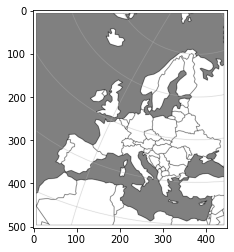

In [17]:
extract_region.plot()

We want to run the diagnostic just for the Netherlands, so we can update the values easily:

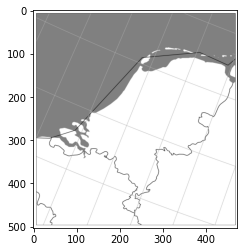

In [18]:
extract_region.set(
    start_longitude=3.31497114423,
    end_longitude=7.09205325687,
    start_latitude=50.803721015,
    end_latitude=53.5104033474,
)
extract_region.plot()

By default, the regridding is done at 2.5$^\circ$.

In [19]:
regrid = climwip_general.steps['regrid']
regrid

PreprocessorStep('regrid', target_grid=2.5x2.5, scheme=linear)

We want to change that to 1.0$^\circ$.

In [20]:
regrid.set(target_grid='1.0x1.0')
regrid

PreprocessorStep('regrid', target_grid=1.0x1.0, scheme=linear)

Before we continue, we may want to update the description.

In [21]:
recipe.set_description('Climwip method applied to the Netherlands region')

We export our modified recipe to a new file.

In [22]:
recipe.save('climwip_netherlands.yml')

Recipe saved to 'climwip_netherlands.yml'


Now the recipe is ready to be run! 

In [23]:
recipe.run()

Session directory: recipe-20201106_154145



Starting Diagnostic('weighting/climwip.py')

Working on 'tas'
Running PreprocessorStep('load_data')
Running PreprocessorStep('cmor_check')
Running Preprocessor('detrended_std')
 -> PreprocessorStep('regrid')
 -> PreprocessorStep('mask_landsea')
 -> PreprocessorStep('extract_region')
 -> PreprocessorStep('detrend')
 -> PreprocessorStep('climate_statistics')

Working on 'pr'
Running PreprocessorStep('load_data')
Running PreprocessorStep('cmor_check')
Running Preprocessor('climatological_mean')
 -> PreprocessorStep('regrid')
 -> PreprocessorStep('mask_landsea')
 -> PreprocessorStep('extract_region')
 -> PreprocessorStep('climate_statistics')

Running script 'weighting/climwip.py'

Starting Diagnostic('weighting/weighted_temperature_graph.py')

Working on 'tas'
Running PreprocessorStep('load_data')
Running PreprocessorStep('cmor_check')
Running Preprocessor('temperature_anomalies')
 -> PreprocessorStep('area_statistics')
 -> PreprocessorStep('annual_statistics')
 -> PreprocessorStep('anom

The output for ESMValTool generally depends on the diagnostic. This can be anything, but what most diagnostics have in common is that they output some sort of plot. It is good practice to save the provenance and output data associated. Here we show how the output data can be accessed and displayed.

The information about the plots is accessed via the `output_plots` attribute, which is now populated. This is a dictionary, so can have a look at what what sort of data has been generated.

In [24]:
recipe.output_plots.keys()

dict_keys(['independence_pr', 'independence_tas', 'performance_tas', 'performance_pr', 'weights_pr', 'weights_tas', 'temperature_anomaly_graph'])

It is a lot of information, but let's say we are interested in the final output, the tempearture anomaly graph.

In [25]:
graph = recipe.output_plots['temperature_anomaly_graph']
graph

{'description': 'Temperature anomaly graph.',
 'directory': WindowsPath('plots/weighted_temperature_graph/weighted_temperature_graph'),
 'filename': 'temperature_anomaly_graph.png',
 'citation': 'temperature_anomaly_graph_citation.bibtex',
 'provenance': 'temperature_anomaly_graph_provenance.xml'}

This entry stores some general information about the graph, its provenance, where it is located, and bibtex entry should we use this graph in one of our publications. Since this is a png, we can use `IPython` to show it for us.

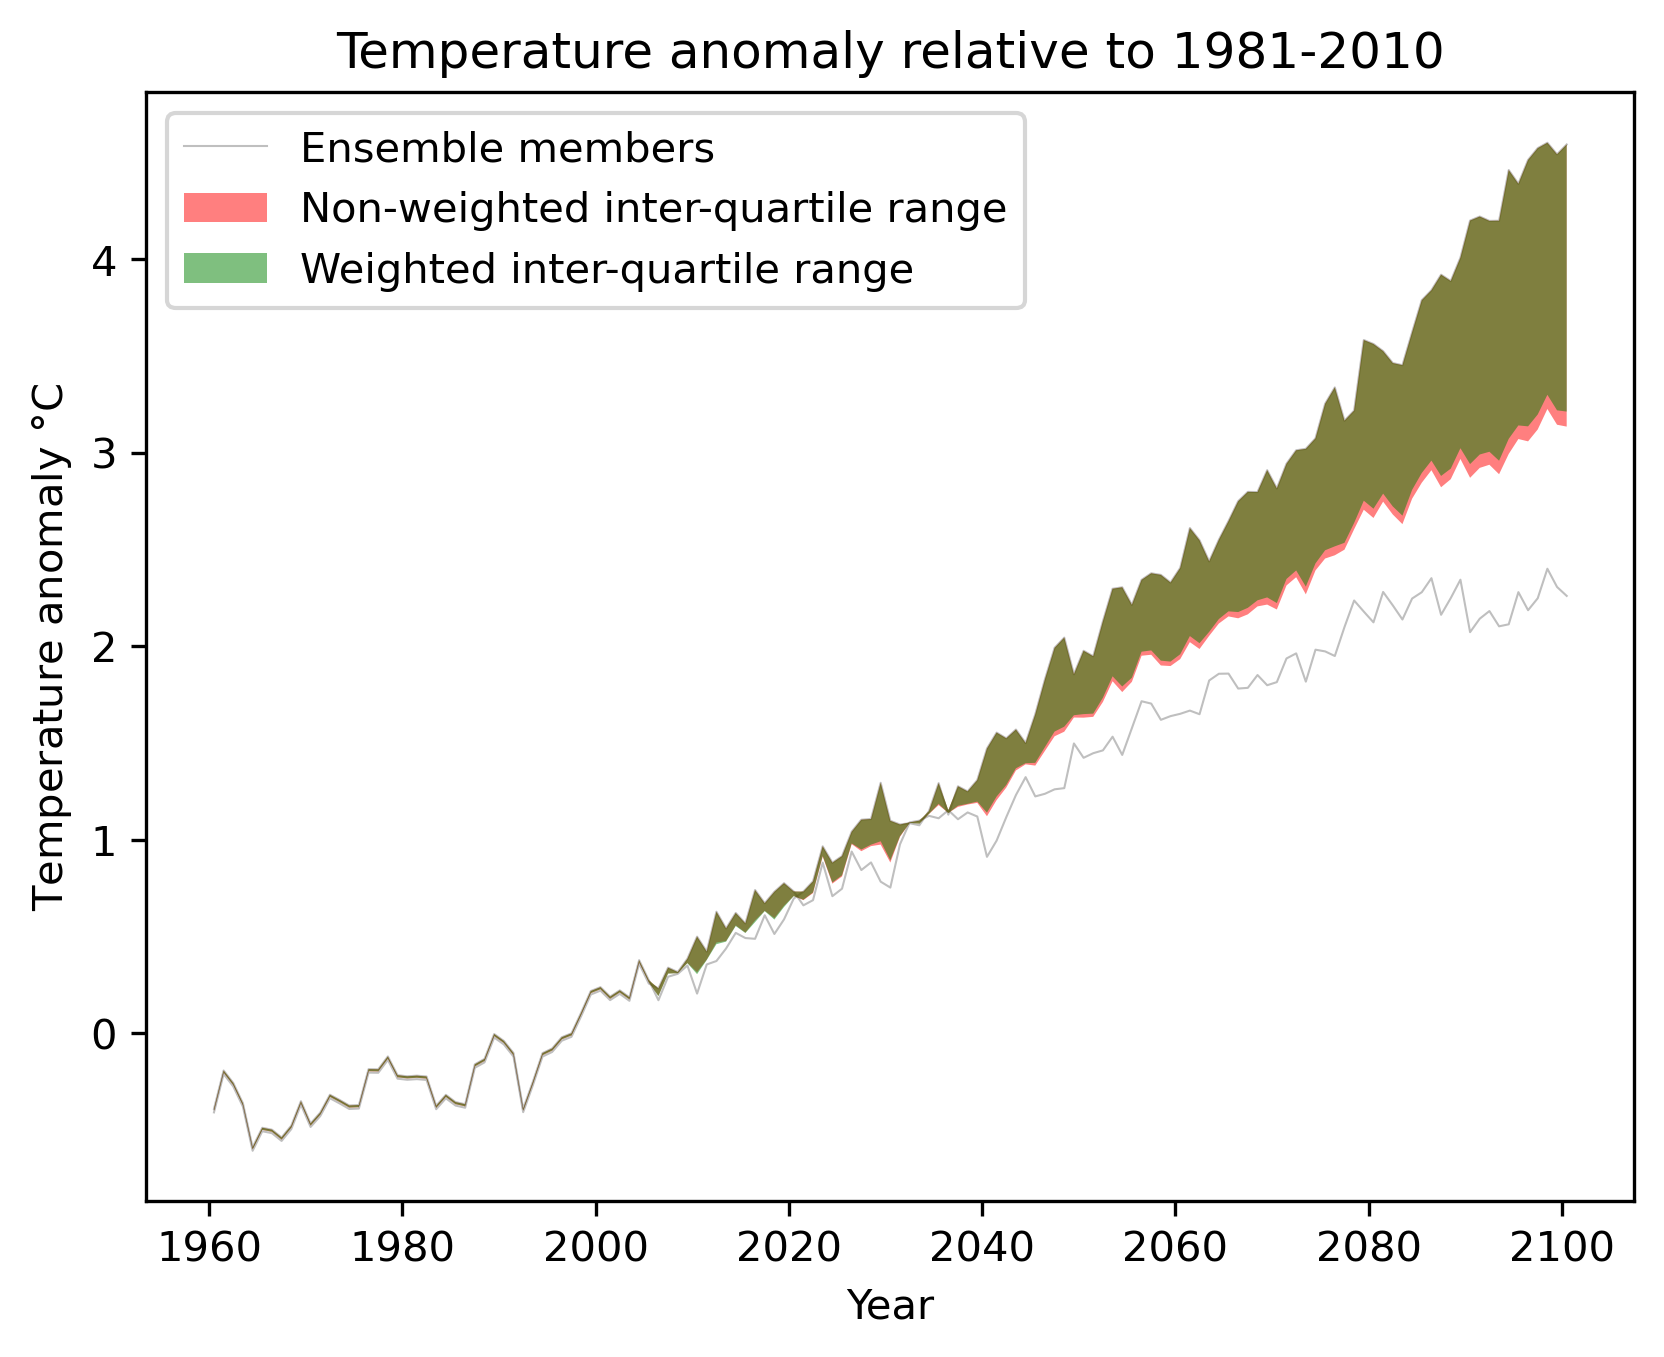

In [26]:
from IPython.display import Image

filename = graph['directory'] / graph['filename']
Image(filename=filename) 

The data associated with the graph is stored in the `work` directory, and can be accessed via the `output_data` attribute, which is also a dictionary

In [27]:
data = recipe.output_data['temperature_anomalies']
data

{'description': 'Temperature anomaly data.',
 'directory': WindowsPath('work/weighted_temperature_graph/weighted_temperature_graph'),
 'filename': 'temperature_anomalies.nc',
 'citation': 'temperature_anomalies_citation.bibtex',
 'provenance': 'temperature_anomalies_provenance.xml'}

The data are stored as a NetCDF4 file, so we can load it using `xarray` or `iris`.

In [28]:
import xarray

filename = data['directory'] / data['filename']
data_array = xarray.load_dataset(filename)
data_array

<xarray.Dataset>
Dimensions:         (model_ensemble: 2, time: 141)
Coordinates:
  * time            (time) datetime64[ns] 1960-07-01 1961-07-01 ... 2100-07-01
  * model_ensemble  (model_ensemble) object 'ACCESS1-0_r1i1p1_historical-rcp4...
Data variables:
    tas             (model_ensemble, time) float64 -0.4088 -0.2101 ... 4.594
Attributes:
    provenance:  <?xml version='1.0' encoding='ASCII'?>\n<prov:document xmlns...
    software:    Created with ESMValTool v2.1.0
    caption:     Temperature anomaly relative to 1981-2010

Finally, we can show the temperature anomaly data. It is a bit of work to recreate the plot, but the data are available to work with :-)

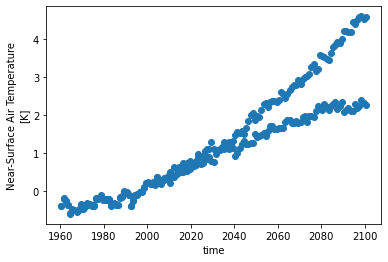

In [29]:
data_array.plot.scatter('time', 'tas')